In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits as mplot3d
import scipy as sp
pd.set_option("display.max_columns", None)


In [2]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [3]:
# DF1 = Total and facet scores, and score per question
df1 = pd.read_excel('RisikoAtlas_EuropeanSurvey_randomhalfone.xlsx')
df1

,random,responseid,country,leg_conditions_riskp,q0,s1,s2_1,age_rec,isced,s7,s8,q5_1,q5_2,q5_5,q5_6,q5_9,q8_2_1,q8_2_2,q8_2_3,q8_2_4,q8_2_5,q8_3,q8_4,q8_5berlin_1,q8_5london_1,q8_5paris_1,q8_6,q8_7,q9_1_1,q9_2_1,q9_3,q10_1_1,q10_2_1,q10_3_1,q10_4,q11_1,q12,q13_1,q13_2,q13_3,q13_4,q13_5,q14_1,q14_na,q15_1,q16,q17,weight,reflectivespending,higherincomegroup,financialproductclear,certainty1,certainty2,certainty3,certainty4,riskcomprehension1,riskcomprehension2,riskcomprehension3,riskcomprehension4,graphliteracy1,graphliteracy2,graphliteracy3,numeracy1,numeracy2,numeracy3,numeracy4,uncertainty1,uncertainty2,uncertainty3,highriskliterate,lowriskliterate,mediumriskliterate,rl_sumscore,incomelevels,emergencyfund,isced_recoded
0,1,2624,10,2,1,1,65,4,2,Vilasantar,capataz,4,2,3,4,4,1,1,1,2,2,4,1,1,1,2,2,4,25,60,4,80,1,10.00,2,2,2,1,1,1,0,0,30000.0,0,6,3,1,0.503211,1,0.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,1,1
1,0,2666,10,1,1,1,61,4,2,LA CORUÑA,JUBILADO,3,3,3,5,1,2,2,2,1,2,1,4,2,1,2,4,4,50,66,4,500,10,10.00,2,0,2,1,1,1,0,0,24000.0,0,0,1,4,0.503211,0,0.0,1,1,1,1,0,1,1,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,7,2.0,0,1
2,1,2891,10,2,1,2,60,4,2,valencia,visitador medico,5,3,2,5,5,1,1,1,1,2,2,4,2,1,1,1,1,25,20,3,500,10,0.10,3,0,3,1,1,0,0,0,200000.0,0,1,3,3,0.503211,0,0.0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,1,8,3.0,1,1
3,1,2609,10,2,1,1,64,4,2,barcelona,ayudante,4,3,2,4,3,1,1,1,1,2,2,2,2,1,1,4,3,50,20,3,500,1000,0.10,2,2,1,1,1,1,0,0,NaN,1,1,3,2,0.503211,1,0.0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,6,1.0,0,1
4,1,2663,10,3,1,2,70,4,2,virgen del camino Leon,Jubilado,5,3,3,4,3,1,1,1,1,2,2,3,2,2,1,1,1,55,20,2,600,5,10.00,1,2,3,1,1,1,1,0,2500.0,0,5,3,1,0.503211,1,0.0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,4,3.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,0,13378,12,1,1,2,28,2,2,estrées,apiculteur,4,3,5,4,5,2,2,2,2,2,4,4,2,1,1,1,1,25,10,3,500,10,10.00,1,1,3,1,1,1,0,0,1000.0,0,2,1,1,1.236911,1,0.0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,10,3.0,1,1
1949,0,13465,12,1,1,2,34,2,2,metz,Employé,4,3,3,4,3,1,2,2,2,2,2,2,1,1,1,3,2,18,20,1,500,10,0.10,2,2,5,1,0,0,0,0,10000.0,0,3,1,2,1.236911,1,1.0,0,0,1,1,1,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,1,0,6,5.0,0,1
1950,0,1122,12,2,1,2,35,2,2,sennecey le grand,employé de commerce,4,2,3,4,4,1,1,1,2,2,2,4,2,1,1,1,3,9,10,1,500,10,0.10,3,0,2,1,1,1,0,0,NaN,1,1,2,2,1.236911,1,0.0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,1,0,0,0,1,7,2.0,0,1
1951,1,12807,12,2,1,2,26,2,2,pulnoy,jardinier,4,4,4,4,4,1,1,1,2,2,3,3,2,1,1,1,3,8,20,3,500,100,0.01,3,0,4,1,0,0,0,0,NaN,1,0,3,2,1.236911,1,1.0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,6,4.0,0,1


In [4]:
df1["age"] = df1["s2_1"]
df1["income"] = df1["q12"]
df1["wealth"] = df1["q14_1"]

df1["Certainty_3"] = df1["certainty1"] + df1["certainty2"] + df1["certainty3"]
df1["RiskComprehension_4"] = df1["riskcomprehension1"] + df1["riskcomprehension2"] + df1["riskcomprehension3"] + df1["riskcomprehension4"]
df1["GraphLiteracy_3"] = df1["graphliteracy1"] + df1["graphliteracy2"] + df1["graphliteracy3"]
df1["Numeracy_3"] = df1["numeracy1"] + df1["numeracy2"] + df1["numeracy3"]
df1["Bayesianreasoning_1"] = df1["numeracy4"]
df1["TotalScore_14"] = df1["Certainty_3"] + df1["RiskComprehension_4"] + df1["GraphLiteracy_3"] + df1["Numeracy_3"] + df1["Bayesianreasoning_1"]

df1["Certainty_%"] = df1["Certainty_3"] / 3 * 100
df1["RiskComprehension_%"] = df1["RiskComprehension_4"] / 4 * 100
df1["GraphLiteracy_%"] = df1["GraphLiteracy_3"] / 3 * 100
df1["Numeracy_%"] = df1["Numeracy_3"] / 3 * 100
df1["Bayesianreasoning_%"] = df1["Bayesianreasoning_1"] / 1 * 100

df1["TotalScore_%"] = df1["TotalScore_14"] / 14 * 100


colReq = ["responseid", "age", "age_rec", "isced", "income", "wealth", "Certainty_3", "RiskComprehension_4", "GraphLiteracy_3",
          "Numeracy_3", "Bayesianreasoning_1", "TotalScore_14", "Certainty_%", "RiskComprehension_%", "GraphLiteracy_%", "Numeracy_%", 
          "Bayesianreasoning_%", "TotalScore_%",]

df2 = df1[colReq].copy()
df2

,responseid,age,age_rec,isced,income,wealth,Certainty_3,RiskComprehension_4,GraphLiteracy_3,Numeracy_3,Bayesianreasoning_1,TotalScore_14,Certainty_%,RiskComprehension_%,GraphLiteracy_%,Numeracy_%,Bayesianreasoning_%,TotalScore_%
0,2624,65,4,2,2,30000.0,0,1,1,0,0,2,0.000000,25.0,33.333333,0.000000,0.0,14.285714
1,2666,61,4,2,2,24000.0,3,2,0,2,0,7,100.000000,50.0,0.000000,66.666667,0.0,50.000000
2,2891,60,4,2,3,200000.0,0,4,3,3,0,10,0.000000,100.0,100.000000,100.000000,0.0,71.428571
3,2609,64,4,2,1,NaN,0,3,2,2,0,7,0.000000,75.0,66.666667,66.666667,0.0,50.000000
4,2663,70,4,2,3,2500.0,0,3,1,0,1,5,0.000000,75.0,33.333333,0.000000,100.0,35.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,13378,28,2,2,3,1000.0,3,4,2,2,1,12,100.000000,100.0,66.666667,66.666667,100.0,85.714286
1949,13465,34,2,2,5,10000.0,2,2,1,3,0,8,66.666667,50.0,33.333333,100.000000,0.0,57.142857
1950,1122,35,2,2,2,NaN,0,4,0,3,0,7,0.000000,100.0,0.000000,100.000000,0.0,50.000000
1951,12807,26,2,2,4,NaN,0,4,2,1,0,7,0.000000,100.0,66.666667,33.333333,0.0,50.000000


In [5]:
df1

,random,responseid,country,leg_conditions_riskp,q0,s1,s2_1,age_rec,isced,s7,s8,q5_1,q5_2,q5_5,q5_6,q5_9,q8_2_1,q8_2_2,q8_2_3,q8_2_4,q8_2_5,q8_3,q8_4,q8_5berlin_1,q8_5london_1,q8_5paris_1,q8_6,q8_7,q9_1_1,q9_2_1,q9_3,q10_1_1,q10_2_1,q10_3_1,q10_4,q11_1,q12,q13_1,q13_2,q13_3,q13_4,q13_5,q14_1,q14_na,q15_1,q16,q17,weight,reflectivespending,higherincomegroup,financialproductclear,certainty1,certainty2,certainty3,certainty4,riskcomprehension1,riskcomprehension2,riskcomprehension3,riskcomprehension4,graphliteracy1,graphliteracy2,graphliteracy3,numeracy1,numeracy2,numeracy3,numeracy4,uncertainty1,uncertainty2,uncertainty3,highriskliterate,lowriskliterate,mediumriskliterate,rl_sumscore,incomelevels,emergencyfund,isced_recoded,age,income,wealth,Certainty_3,RiskComprehension_4,GraphLiteracy_3,Numeracy_3,Bayesianreasoning_1,TotalScore_14,Certainty_%,RiskComprehension_%,GraphLiteracy_%,Numeracy_%,Bayesianreasoning_%,TotalScore_%
0,1,2624,10,2,1,1,65,4,2,Vilasantar,capataz,4,2,3,4,4,1,1,1,2,2,4,1,1,1,2,2,4,25,60,4,80,1,10.00,2,2,2,1,1,1,0,0,30000.0,0,6,3,1,0.503211,1,0.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,2.0,1,1,65,2,30000.0,0,1,1,0,0,2,0.000000,25.0,33.333333,0.000000,0.0,14.285714
1,0,2666,10,1,1,1,61,4,2,LA CORUÑA,JUBILADO,3,3,3,5,1,2,2,2,1,2,1,4,2,1,2,4,4,50,66,4,500,10,10.00,2,0,2,1,1,1,0,0,24000.0,0,0,1,4,0.503211,0,0.0,1,1,1,1,0,1,1,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,7,2.0,0,1,61,2,24000.0,3,2,0,2,0,7,100.000000,50.0,0.000000,66.666667,0.0,50.000000
2,1,2891,10,2,1,2,60,4,2,valencia,visitador medico,5,3,2,5,5,1,1,1,1,2,2,4,2,1,1,1,1,25,20,3,500,10,0.10,3,0,3,1,1,0,0,0,200000.0,0,1,3,3,0.503211,0,0.0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,1,8,3.0,1,1,60,3,200000.0,0,4,3,3,0,10,0.000000,100.0,100.000000,100.000000,0.0,71.428571
3,1,2609,10,2,1,1,64,4,2,barcelona,ayudante,4,3,2,4,3,1,1,1,1,2,2,2,2,1,1,4,3,50,20,3,500,1000,0.10,2,2,1,1,1,1,0,0,NaN,1,1,3,2,0.503211,1,0.0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,6,1.0,0,1,64,1,NaN,0,3,2,2,0,7,0.000000,75.0,66.666667,66.666667,0.0,50.000000
4,1,2663,10,3,1,2,70,4,2,virgen del camino Leon,Jubilado,5,3,3,4,3,1,1,1,1,2,2,3,2,2,1,1,1,55,20,2,600,5,10.00,1,2,3,1,1,1,1,0,2500.0,0,5,3,1,0.503211,1,0.0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,4,3.0,1,1,70,3,2500.0,0,3,1,0,1,5,0.000000,75.0,33.333333,0.000000,100.0,35.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,0,13378,12,1,1,2,28,2,2,estrées,apiculteur,4,3,5,4,5,2,2,2,2,2,4,4,2,1,1,1,1,25,10,3,500,10,10.00,1,1,3,1,1,1,0,0,1000.0,0,2,1,1,1.236911,1,0.0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,10,3.0,1,1,28,3,1000.0,3,4,2,2,1,12,100.000000,100.0,66.666667,66.666667,100.0,85.714286
1949,0,13465,12,1,1,2,34,2,2,metz,Employé,4,3,3,4,3,1,2,2,2,2,2,2,1,1,1,3,2,18,20,1,500,10,0.10,2,2,5,1,0,0,0,0,10000.0,0,3,1,2,1.236911,1,1.0,0,0,1,1,1,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,1,0,6,5.0,0,1,34,5,10000.0,2,2,1,3,0,8,66.666667,50.0,33.333333,100.000000,0.0,57.142857
1950,0,1122,12,2,1,2,35,2,2,sennecey le grand,employé de commerce,4,2,3,4,4,1,1,1,2,2,2,4,2,1,1,1,3,9,10,1,500,10,0.10,3,0,2,1,1,1,0,0,NaN,1,1,2,2,1.236911,1,0.0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,1,0,0,0,1,7,2.0,0,1,35,2,NaN,0,4,0,3,0,7,0.000000,100.0,0.000000,100.000000,0.0,50.000000
1951,1,12807,12,2,1,2,26,2,2,pulnoy,jardinier,4,4,4,4,4,1,1,1,2,2,3,3,2,1,1,1,3,8,20,3,500,100,0.01,3,0,4,1,0,0,0,0,NaN,1,0,3,2,1.236911,1,1.0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,6,4.0,0,1,26,4,NaN,0,4,2,1,0,7,0.000000,100.0,66.666667,33.333333,0.0,50.000000


In [6]:
df1.to_csv("RisikoAtlas_EuropeanSurvey_randomhalfone v190924.csv")

In [7]:
# DF3 = Sorted by income, income = 7 removed
# riskQuartile introduced

df3 = df2.sort_values(by = 'income')
df3 = df3.reset_index(drop = True)
df3.drop(df3[df3['income'] == 7].index, inplace = True)
df3.insert(loc = len(df3.columns), column = "riskQuartile", value = pd.qcut(df3["TotalScore_14"],q = 4, labels = False ) + 1, allow_duplicates = 'False')

df3

,responseid,age,age_rec,isced,income,wealth,Certainty_3,RiskComprehension_4,GraphLiteracy_3,Numeracy_3,Bayesianreasoning_1,TotalScore_14,Certainty_%,RiskComprehension_%,GraphLiteracy_%,Numeracy_%,Bayesianreasoning_%,TotalScore_%,riskQuartile
0,3121,25,2,1,1,NaN,0,3,2,3,0,8,0.000000,75.0,66.666667,100.000000,0.0,57.142857,3
1,922,62,4,3,1,5000.0,1,3,3,2,1,10,33.333333,75.0,100.000000,66.666667,100.0,71.428571,4
2,9780,32,2,2,1,600.0,0,2,1,1,0,4,0.000000,50.0,33.333333,33.333333,0.0,28.571429,1
3,5235,26,2,1,1,1000.0,0,1,1,1,0,3,0.000000,25.0,33.333333,33.333333,0.0,21.428571,1
4,6429,25,2,1,1,5300.0,1,1,1,1,0,4,33.333333,25.0,33.333333,33.333333,0.0,28.571429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,330,53,3,1,6,5000.0,1,2,2,3,0,8,33.333333,50.0,66.666667,100.000000,0.0,57.142857,3
1696,9132,55,3,1,6,NaN,0,0,2,0,0,2,0.000000,0.0,66.666667,0.000000,0.0,14.285714,1
1697,27,46,3,1,6,500000.0,3,4,3,3,0,13,100.000000,100.0,100.000000,100.000000,0.0,92.857143,4
1698,8715,33,2,2,6,3500000.0,0,2,1,1,0,4,0.000000,50.0,33.333333,33.333333,0.0,28.571429,1


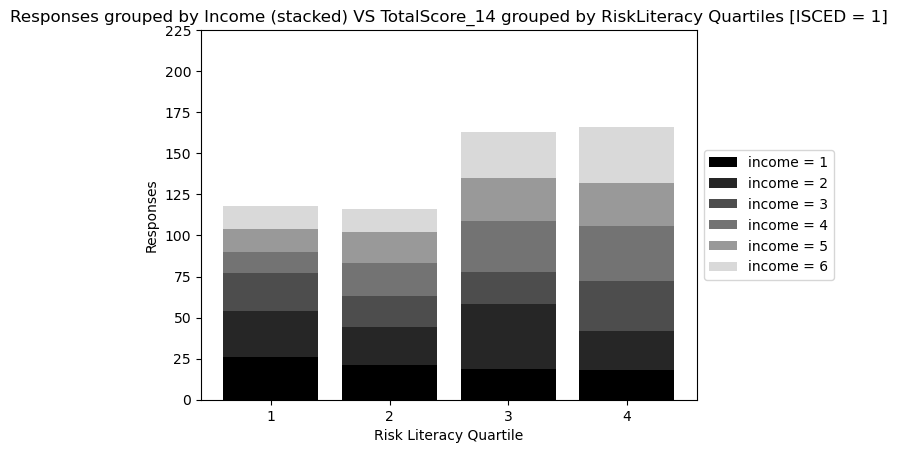

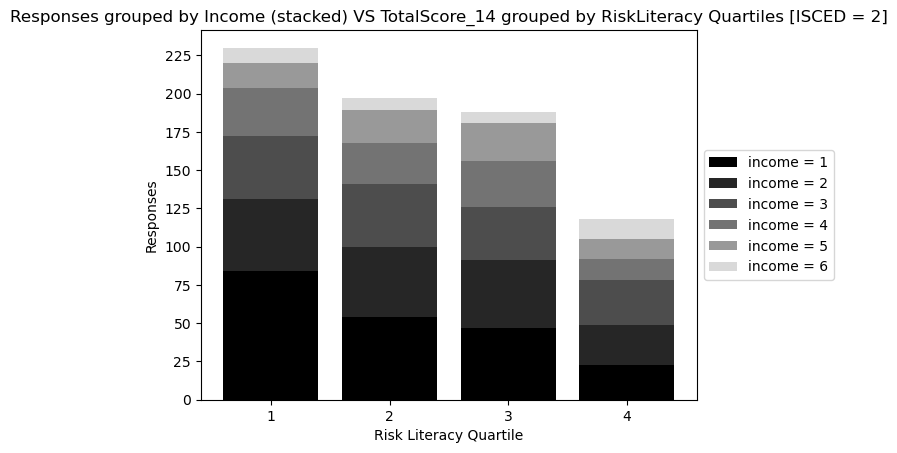

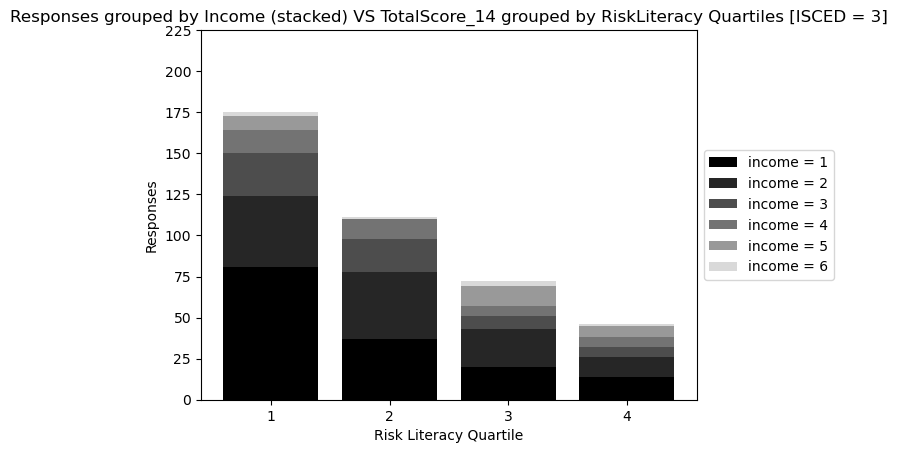

In [8]:
x = [1, 2, 3, 4]
y1 = df3.loc[(df3["income"]==1)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y2 = df3.loc[(df3["income"]==2)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y3 = df3.loc[(df3["income"]==3)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y4 = df3.loc[(df3["income"]==4)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y5 = df3.loc[(df3["income"]==5)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y6 = df3.loc[(df3["income"]==6)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

plt.bar(x, y1, color='black')
plt.bar(x, y2, bottom=y1, color=lighten_color("black", 0.85))
plt.bar(x, y3, bottom=y1+y2, color=lighten_color("black", 0.7))
plt.bar(x, y4, bottom=y1+y2+y3, color=lighten_color("black", 0.55))
plt.bar(x, y5, bottom=y1+y2+y3+y4, color=lighten_color("black", 0.4))
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color=lighten_color("black", 0.15))
plt.xlabel("Risk Literacy Quartile")
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(0, 250, step=25))
plt.ylabel("Responses")
plt.legend(["income = 1", "income = 2", "income = 3", "income = 4", "income = 5", "income = 6"], loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("Responses grouped by Income (stacked) VS TotalScore_14 grouped by RiskLiteracy Quartiles [ISCED = 1]")
plt.show()

x = [1, 2, 3, 4]
y1 = df3.loc[(df3["income"]==1)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y2 = df3.loc[(df3["income"]==2)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y3 = df3.loc[(df3["income"]==3)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y4 = df3.loc[(df3["income"]==4)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y5 = df3.loc[(df3["income"]==5)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y6 = df3.loc[(df3["income"]==6)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

plt.bar(x, y1, color='black')
plt.bar(x, y2, bottom=y1, color=lighten_color("black", 0.85))
plt.bar(x, y3, bottom=y1+y2, color=lighten_color("black", 0.7))
plt.bar(x, y4, bottom=y1+y2+y3, color=lighten_color("black", 0.55))
plt.bar(x, y5, bottom=y1+y2+y3+y4, color=lighten_color("black", 0.4))
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color=lighten_color("black", 0.15))
plt.xlabel("Risk Literacy Quartile")
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(0, 250, step=25))
plt.ylabel("Responses")
plt.legend(["income = 1", "income = 2", "income = 3", "income = 4", "income = 5", "income = 6"], loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("Responses grouped by Income (stacked) VS TotalScore_14 grouped by RiskLiteracy Quartiles [ISCED = 2]")
plt.show()

x = [1, 2, 3, 4]
y1 = df3.loc[(df3["income"]==1)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y2 = df3.loc[(df3["income"]==2)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y3 = df3.loc[(df3["income"]==3)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y4 = df3.loc[(df3["income"]==4)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y5 = df3.loc[(df3["income"]==5)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y6 = df3.loc[(df3["income"]==6)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

plt.bar(x, y1, color='black')
plt.bar(x, y2, bottom=y1, color=lighten_color("black", 0.85))
plt.bar(x, y3, bottom=y1+y2, color=lighten_color("black", 0.7))
plt.bar(x, y4, bottom=y1+y2+y3, color=lighten_color("black", 0.55))
plt.bar(x, y5, bottom=y1+y2+y3+y4, color=lighten_color("black", 0.4))
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color=lighten_color("black", 0.15))
plt.xlabel("Risk Literacy Quartile")
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(0, 250, step=25))
plt.ylabel("Responses")
plt.legend(["income = 1", "income = 2", "income = 3", "income = 4", "income = 5", "income = 6"], loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("Responses grouped by Income (stacked) VS TotalScore_14 grouped by RiskLiteracy Quartiles [ISCED = 3]")
plt.show()

In [9]:
df3.loc[(df3["income"]==5)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

riskQuartile
1     9.0
2     0.0
3    12.0
4     7.0
Name: count, dtype: float64

In [10]:
# Data Frame 2 or df2 is an aggregate data on facet total scores and over all total score, along with wealth and income data vs each response. 
# This data set is also sorted by wealth with all responses 'NA' removed.
# We also assign quartiles ranking each response according to this sort.

df4 = df2.sort_values(by = 'wealth')
df4 = df4.reset_index(drop = True)
df4 = df4.dropna(axis = 0, subset = 'wealth')
df4.insert(loc = len(df4.columns), column = "wealthQuartile", value = pd.qcut(df4["wealth"],q = 4, labels = False ) + 1, allow_duplicates = 'False')
df4.insert(loc = len(df4.columns), column = "riskQuartile", value = pd.qcut(df4["TotalScore_14"],q = 4, labels = False ) + 1, allow_duplicates = 'False')

df4

,responseid,age,age_rec,isced,income,wealth,Certainty_3,RiskComprehension_4,GraphLiteracy_3,Numeracy_3,Bayesianreasoning_1,TotalScore_14,Certainty_%,RiskComprehension_%,GraphLiteracy_%,Numeracy_%,Bayesianreasoning_%,TotalScore_%,wealthQuartile,riskQuartile
0,7204,57,3,2,1,0.0,0,3,3,2,0,8,0.000000,75.0,100.000000,66.666667,0.0,57.142857,1,3
1,1076,39,3,3,2,0.0,3,3,3,2,0,11,100.000000,75.0,100.000000,66.666667,0.0,78.571429,1,4
2,568,71,4,3,6,0.0,0,2,0,1,0,3,0.000000,50.0,0.000000,33.333333,0.0,21.428571,1,1
3,262,62,4,2,2,0.0,0,1,2,2,0,5,0.000000,25.0,66.666667,66.666667,0.0,35.714286,1,1
4,887,70,4,3,1,0.0,1,1,2,2,0,6,33.333333,25.0,66.666667,66.666667,0.0,42.857143,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,3160,49,3,1,4,4500000.0,1,4,2,2,0,9,33.333333,100.0,66.666667,66.666667,0.0,64.285714,4,3
1118,1519,71,4,3,2,5000000.0,1,3,0,0,0,4,33.333333,75.0,0.000000,0.000000,0.0,28.571429,4,1
1119,6471,71,4,2,3,5000000.0,0,1,2,3,0,6,0.000000,25.0,66.666667,100.000000,0.0,42.857143,4,2
1120,97,24,2,1,4,5000000.0,3,3,2,0,1,9,100.000000,75.0,66.666667,0.000000,100.0,64.285714,4,3


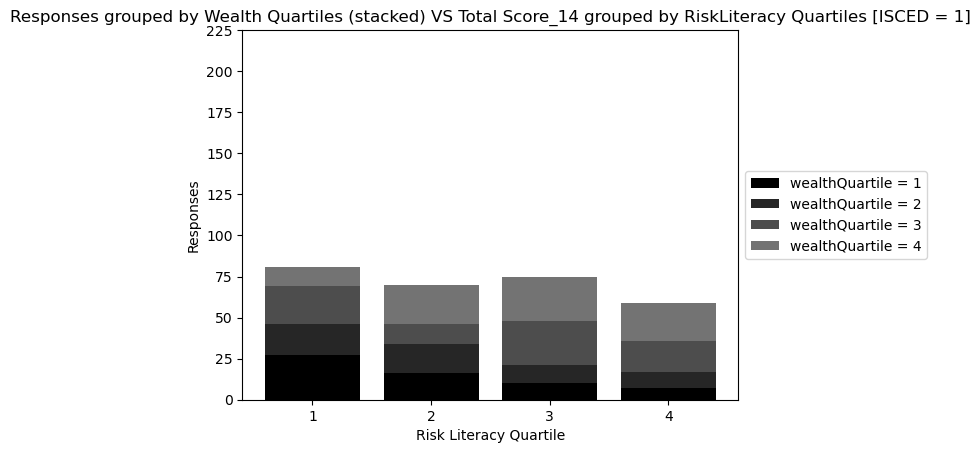

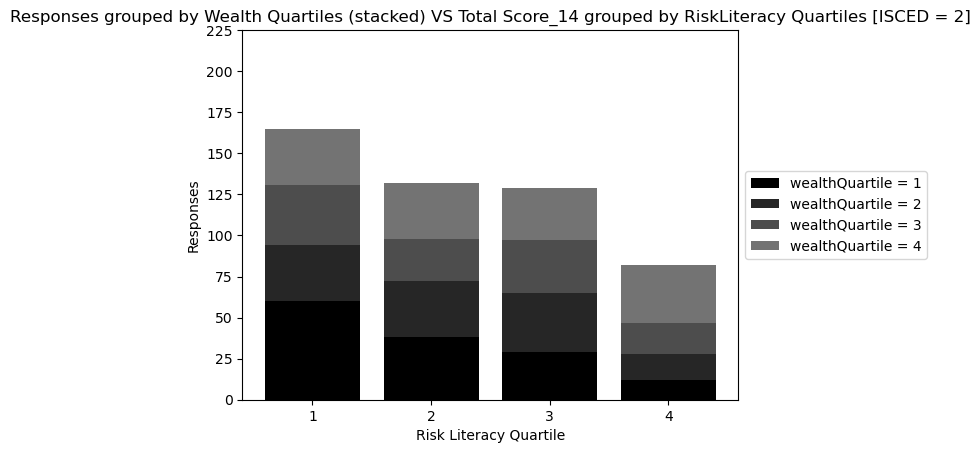

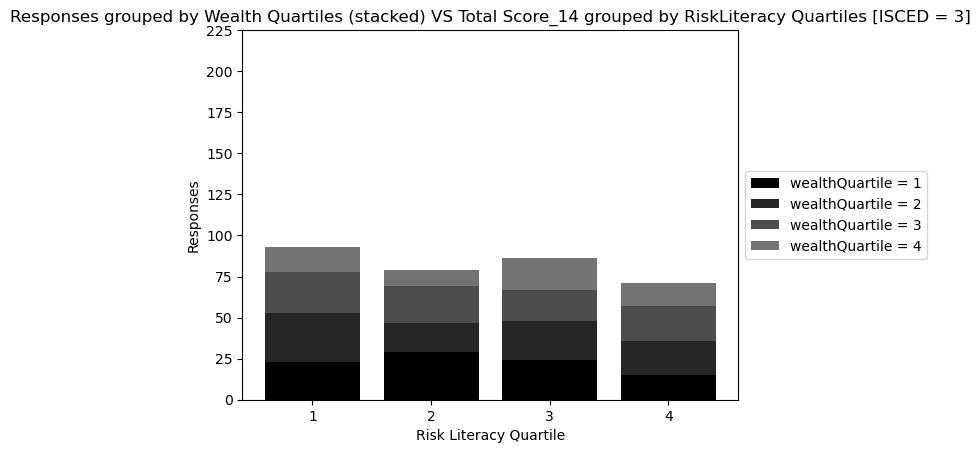

In [11]:
x = [1, 2, 3, 4]
y1 = df4.loc[(df4["wealthQuartile"]==1)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y2 = df4.loc[(df4["wealthQuartile"]==2)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y3 = df4.loc[(df4["wealthQuartile"]==3)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y4 = df4.loc[(df4["wealthQuartile"]==4)&(df3["isced"] == 1), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

plt.bar(x, y1, color='black')
plt.bar(x, y2, bottom=y1, color=lighten_color("black", 0.85))
plt.bar(x, y3, bottom=y1+y2, color=lighten_color("black", 0.7))
plt.bar(x, y4, bottom=y1+y2+y3, color=lighten_color("black", 0.55))

plt.xlabel("Risk Literacy Quartile")
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(0, 250, step=25))
plt.ylabel("Responses")
plt.legend(["wealthQuartile = 1", "wealthQuartile = 2", "wealthQuartile = 3", "wealthQuartile = 4"], loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("Responses grouped by Wealth Quartiles (stacked) VS Total Score_14 grouped by RiskLiteracy Quartiles [ISCED = 1]")
plt.show()

x = [1, 2, 3, 4]
y1 = df4.loc[(df4["wealthQuartile"]==1)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y2 = df4.loc[(df4["wealthQuartile"]==2)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y3 = df4.loc[(df4["wealthQuartile"]==3)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y4 = df4.loc[(df4["wealthQuartile"]==4)&(df3["isced"] == 2), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

plt.bar(x, y1, color='black')
plt.bar(x, y2, bottom=y1, color=lighten_color("black", 0.85))
plt.bar(x, y3, bottom=y1+y2, color=lighten_color("black", 0.7))
plt.bar(x, y4, bottom=y1+y2+y3, color=lighten_color("black", 0.55))

plt.xlabel("Risk Literacy Quartile")
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(0, 250, step=25))
plt.ylabel("Responses")
plt.legend(["wealthQuartile = 1", "wealthQuartile = 2", "wealthQuartile = 3", "wealthQuartile = 4"], loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("Responses grouped by Wealth Quartiles (stacked) VS Total Score_14 grouped by RiskLiteracy Quartiles [ISCED = 2]")
plt.show()

x = [1, 2, 3, 4]
y1 = df4.loc[(df4["wealthQuartile"]==1)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y2 = df4.loc[(df4["wealthQuartile"]==2)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y3 = df4.loc[(df4["wealthQuartile"]==3)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)
y4 = df4.loc[(df4["wealthQuartile"]==4)&(df3["isced"] == 3), "riskQuartile"].value_counts().sort_index().reindex(range(1,5)).fillna(0)

plt.bar(x, y1, color='black')
plt.bar(x, y2, bottom=y1, color=lighten_color("black", 0.85))
plt.bar(x, y3, bottom=y1+y2, color=lighten_color("black", 0.7))
plt.bar(x, y4, bottom=y1+y2+y3, color=lighten_color("black", 0.55))

plt.xlabel("Risk Literacy Quartile")
plt.xticks(np.arange(1, 5, step=1))
plt.yticks(np.arange(0, 250, step=25))
plt.ylabel("Responses")
plt.legend(["wealthQuartile = 1", "wealthQuartile = 2", "wealthQuartile = 3", "wealthQuartile = 4"], loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("Responses grouped by Wealth Quartiles (stacked) VS Total Score_14 grouped by RiskLiteracy Quartiles [ISCED = 3]")
plt.show()